In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import backtrader as bt

In [2]:
data = pd.read_excel(r'/home/baichen/Downloads/ibtrade/NVDA_10Y_1day.xlsx',index_col=0,parse_dates=["Date"])

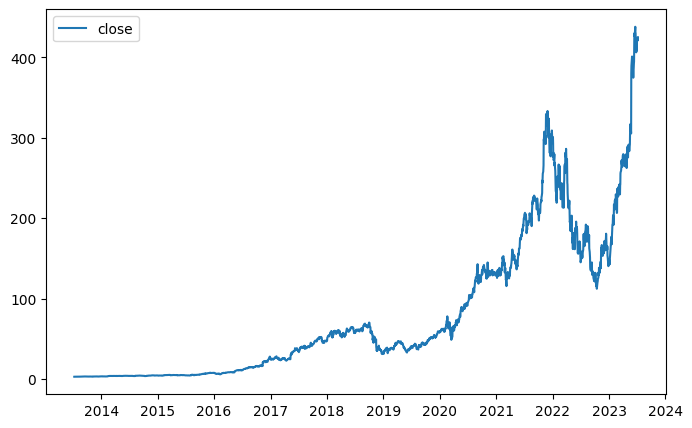

In [4]:
plt.figure(figsize=(8,5))
plt.plot(data['Close'],label='close')
plt.legend(loc="upper left")
plt.show()

In [12]:
class TestStrategy(bt.Strategy):

    def next(self):
        size = int(self.broker.get_cash() / self.data)
        self.buy(size=size)

In [13]:
data_parsed=bt.feeds.PandasData(dataname=data,datetime=None,open=0,high=1,low=2,close=3,volume=4,openinterest=-1)

In [14]:
cerebro = bt.Cerebro()
cerebro.adddata(data_parsed,name='TestData')
cerebro.addstrategy(TestStrategy)

0

In [15]:
cerebro.run()

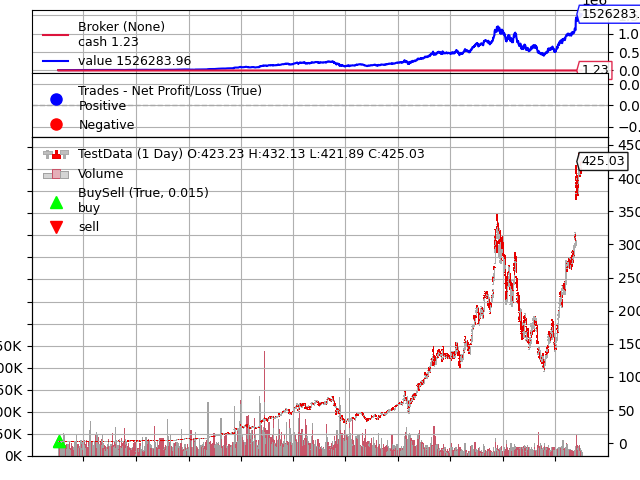

[[<Figure size 640x480 with 4 Axes>]]

In [17]:
%matplotlib inline
%matplotlib widget
cerebro.plot(iplot=False,style='candle',width=80)